# Car Price Prediction

In [4]:
import numpy as np
import pandas as pd
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('dataset/Car.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# Data Preprocessing
import datetime

In [11]:
date_time = datetime.datetime.now()

In [12]:
data['Age'] = date_time.year - data['Year']

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [14]:
data.drop('Year',axis=1,inplace=True)

In [15]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [16]:
# Outlier Removal
import seaborn as sb

<Axes: ylabel='Selling_Price'>

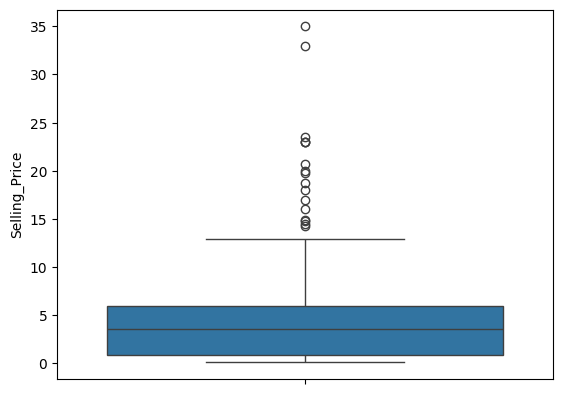

In [17]:
sb.boxplot(data['Selling_Price'])

In [18]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [19]:
df=data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [20]:
df.shape

(299, 9)

In [21]:
# Encoding the Categorical columns
print(df['Fuel_Type'].unique())
#print(df['Selling_type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [22]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
#df['Selling_type'] = df['Selling_type'].map({'Dealer':0,'Individual':1})
df['Transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

In [23]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,Dealer,0,0,10
1,sx4,4.75,9.54,43000,1,Dealer,0,0,11
2,ciaz,7.25,9.85,6900,0,Dealer,0,0,7
3,wagon r,2.85,4.15,5200,0,Dealer,0,0,13
4,swift,4.60,6.87,42450,1,Dealer,0,0,10


In [24]:
X = df.drop(['Selling_Price','Car_Name','Selling_type'],axis=1)

In [25]:
y = df['Selling_Price']

In [26]:
# Split Data
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [28]:
# Import Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred1 = lr.predict(X_test)
y_pred1

array([ 8.27712393,  7.34975811,  1.5250228 ,  6.38146689, 12.60785431,
        4.28515649, 10.23225965,  1.97692654,  8.48191164, -1.01734694,
       11.8695869 , -0.7679291 , -0.07311352,  1.55917192,  9.98334166,
       11.05937279,  1.37646384,  2.19380251, 23.36016102,  0.94278187,
        1.04381869,  3.02055269,  5.57143541,  2.24722262,  2.29940198,
        8.87573459,  8.85560762,  1.37897146,  5.1986513 ,  5.08039665,
        7.80384448,  5.23551592,  6.67940336,  2.08225037,  8.25010358,
        6.34220336,  1.52210694, -8.69891363,  1.47283086, 11.84915632,
        8.1146731 ,  9.23428602,  1.88052259,  3.533879  ,  1.1157725 ,
       -1.92666705,  9.14899759,  4.22661076,  4.46163917, -0.64606082,
        0.85782211,  0.38619444, 12.6349897 ,  9.64304805,  8.27853072,
        5.41508354,  3.61939413,  2.48180155,  9.95527427, 23.17293086])

In [31]:
rf = RandomForestRegressor()

In [32]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y_pred2 = rf.predict(X_test)
y_pred2

array([ 9.957 ,  8.336 ,  0.428 ,  6.791 , 14.462 ,  5.2525,  7.0284,
        1.1815,  7.9885,  0.3327, 11.149 ,  0.2154,  0.242 ,  0.4569,
        5.199 ,  7.5938,  0.6123,  1.1655, 21.7225,  0.5619,  0.566 ,
        2.7735,  6.2475,  2.992 ,  2.458 ,  8.9455,  8.8563,  1.187 ,
        4.8806,  5.429 ,  7.8915,  4.3595,  6.6855,  2.73  ,  8.6974,
        6.5691,  1.172 ,  0.1644,  1.176 , 13.913 ,  6.8265,  9.2791,
        0.9332,  3.6582,  0.555 ,  0.2028,  9.6501,  4.891 ,  4.1055,
        0.2191,  0.5896,  0.3405, 14.5915, 10.113 ,  7.9241,  6.6765,
        3.2135,  2.7625, 10.6545, 21.295 ])

In [34]:
gbr = GradientBoostingRegressor()

In [35]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [36]:
y_pred3 = gbr.predict(X_test)
y_pred3

array([ 9.11896772,  8.47893158,  0.49597088,  7.12989482, 10.96091836,
        4.87389752,  5.98300447,  1.27752842,  8.36511661,  0.31732218,
        9.18844235,  0.215739  ,  0.35645599,  0.51840479,  5.16330185,
        7.74398901,  0.6727799 ,  1.48118857, 21.09759507,  0.51784035,
        0.51784035,  3.08372582,  5.98080381,  2.84581583,  2.56854013,
        8.98281132, 10.44770344,  1.08325308,  4.66306345,  5.1762749 ,
        7.72433924,  4.46016838,  6.91086211,  2.63478274,  8.52223357,
        6.78472721,  1.12909332,  0.13534943,  1.11096168,  9.5300489 ,
        7.16900547,  9.16035326,  0.9045554 ,  3.58970561,  0.56368059,
        0.14524456,  9.78864733,  4.42856001,  4.15898079,  0.18317149,
        0.49684415,  0.3205332 ,  9.81037579, 10.93884313,  8.5457961 ,
        6.97052238,  3.0650441 ,  2.87721723, 12.51895752, 21.17393191])

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score1 = r2_score(y_test,y_pred1)
r2_score1

0.6684644046158437

In [39]:
r2_score2= r2_score(y_test,y_pred2)
r2_score2

0.7147727321965309

In [40]:
r2_score3 = r2_score(y_test,y_pred3)
r2_score3

0.8714871765543013

In [41]:
models= pd.DataFrame({'Models' :['LR','RF','GBR'],'R2_Score':[r2_score1,r2_score2,r2_score3]})
models

,Models,R2_Score
0,LR,0.668464
1,RF,0.714773
2,GBR,0.871487


<Axes: xlabel='Models', ylabel='R2_Score'>

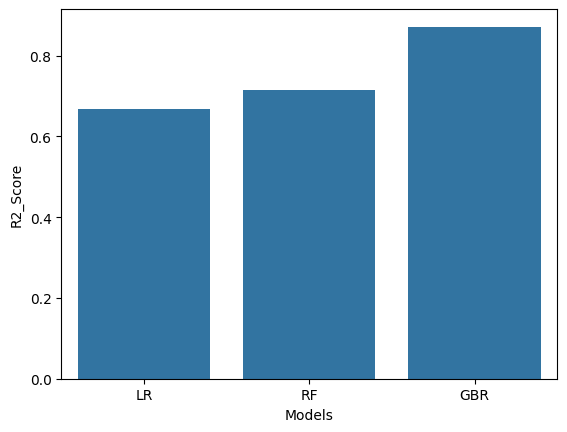

In [42]:
sb.barplot(x=models['Models'],y=models['R2_Score'])

In [43]:
# Save Model
gbr = GradientBoostingRegressor()

In [44]:
final_model=gbr.fit(X_train,y_train)

In [45]:
import joblib
joblib.dump(final_model,'car_price_prediction')

['car_price_prediction']

In [46]:
model = joblib.load('car_price_prediction')

In [47]:
# Prediction on New Data

In [48]:
new_data = pd.DataFrame({
    'Present_Price':4.15,
    'Driven_kms' : 5200,
    'Fuel_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':13},index=[4])

In [49]:
model.predict(new_data)

array([2.43715907])